# **Binary Classification using Logistic Regression**
***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

## Make Dataset

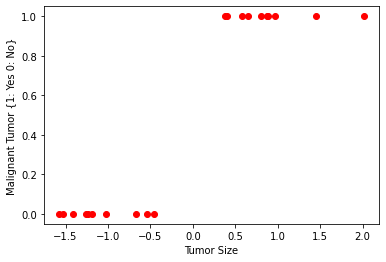

In [38]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=20, n_features=1, n_informative=1, n_redundant=0 , n_clusters_per_class=1, flip_y=0, random_state=8)

# Plotting 
plt.figure(figsize=(6,4))
plt.scatter(X, y, c='r', marker='o')
plt.ylabel("Malignant Tumor {1: Yes 0: No}")
plt.xlabel("Tumor Size")
plt.show()

## Classification using Linear Regression

Untuk mengklasifikasikan antara nilai biner (0 atau 1) dicoba dengan menggunakan model Linear Rgression. Dibawah dicoba bagaimana performa model ini dalam Binary Classification. 

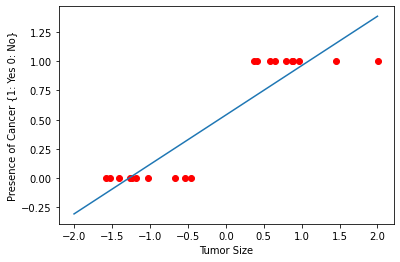

In [39]:
#Linear Regression be used to solve a classification
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X, y)

z = np.linspace(-2, 2, 1000)
z_predict = lm.intercept_ + (lm.coef_ * z)

plt.figure(figsize=(6,4))
plt.scatter(X, y, c='r', marker='o')
plt.plot(z, z_predict)
plt.ylabel("Presence of Cancer {1: Yes 0: No}")
plt.xlabel("Tumor Size")
plt.show()

Dari grafik diatas dapat dilihat bahwa linear regression **tidak cocok** untuk mengklasifikasikan nilai biner (0 atau 1). Hasilnya apabila menggunakan linear regression tidak dapat mengklasifikasikan apakah terdapat Cancer atau tidak.

Text(0, 0.5, 'Target')

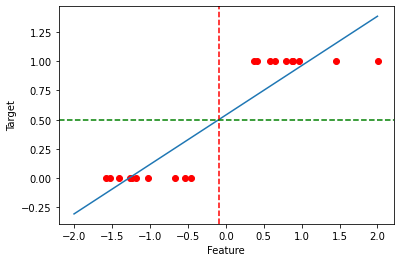

In [40]:
# Desicion Boundary

x_critical = (0.5 - lm.intercept_)/ lm.coef_

plt.figure(figsize=(6,4))
plt.scatter(X, y, c='r', marker='o')
plt.plot(z, z_predict)
plt.axvline(x=x_critical, color='r', linestyle='--')
plt.axhline(y=0.5, color='g', linestyle='--')
plt.xlabel('Feature')
plt.ylabel('Target')

Untuk mengatasinya maka dibuat Decision Boundary untuk memberikan ambang batas (Threshold) pada klasifikasi dengan Linear regression. Hasilnya, threshold dapat memisahkan/mengklasifikasikan antara nilai biner (0 atau 1) dengan pengaturan batas klasifikasi di y=0.5 dan x=Threshold

Namun ketika ditambahkan data outlier, maka klasifikasi dengan model Linear Regression tidak memiliki performa yang baik lagi, karena nilai Threshold (x) kemudian akan bergeser sehingga tidak bisa lagi untuk mengklasifikasikan antara kedua nilai biner.

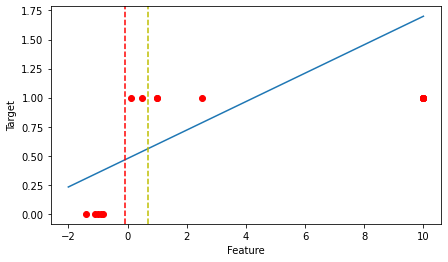

In [50]:
# Check perform in outlier
new_obs = 10
X = np.vstack([X, new_obs])
y = np.append(y, 1)

lm = LinearRegression()
lm.fit(X, y)
x_critical2 = (0.5 - lm.intercept_)/ lm.coef_

plt.figure(figsize=(7,4))
plt.scatter(X, y, c='r', marker='o')
plt.plot(z, z_predict)
plt.axvline(x=x_critical, color='r', linestyle='--')
plt.axvline(x=x_critical2, color='y', linestyle='--')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

## Classification using Logistic Regression

Untuk mengklasifikasikan antara nilai biner (0 atau 1) dicoba dengan menggunakan model Logistic Rgression. Dibawah dicoba bagaimana performa model ini dalam Binary Classification. 

Text(0, 0.5, 'Target')

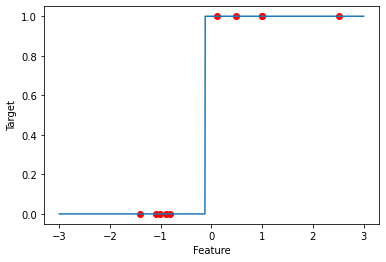

In [44]:
#Logistic Regression be used to solve a classification
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
X, y = make_classification(n_samples=10, n_features=1, n_informative=1, n_redundant=0 , n_clusters_per_class=1, flip_y=0, random_state=7)
clf.fit(X, y)
LogisticRegression()

plt.figure(figsize=(6,4))
plt.scatter(X, y, c='r', marker='o')
xt = np.linspace(-3, 3, 1000).reshape(1000,1)
yt = clf.predict(xt)
plt.plot(xt, yt)
plt.xlabel('Feature')
plt.ylabel('Target')

Dari grafik diatas dapat dilihat bahwa logistic regression **lebih cocok** untuk mengklasifikasikan nilai biner (0 atau 1). Hasilnya apabila menggunakan logistic regression, dapat mengklasifikasikan apakah terdapat Cancer atau tidak.

Kemudian dicoba bagaimana performa model Logistic Regression ketika ditambahkan data outlier.

Text(0, 0.5, 'Target')

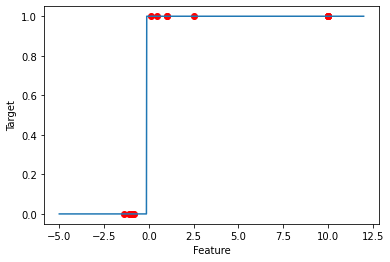

In [49]:
# Check perform in outlier
new_obs = 10
X = np.vstack([X, new_obs])
y = np.append(y, 1)
clf.fit(X, y)
LogisticRegression()

plt.figure(figsize=(6,4))
plt.scatter(X, y, c='r', marker='o')
xt = np.linspace(-5, 12, 1000).reshape(1000,1)
yt = clf.predict(xt)
plt.plot(xt, yt)
plt.xlabel('Feature')
plt.ylabel('Target')

Hasilnya model dengan Logistic Regression tetap dapat memiliki performa yang bagus untuk mengklasifikasikan data biner meskipun terdapat tambahan data outlier.

# **Evaluation Metrics**

In [2]:
# Importing Libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [3]:
url = 'https://raw.githubusercontent.com/bluedataconsulting/AIMasteryProgram/main/Lab_Exercises/Module5/loan_prediction.csv'
df = pd.read_csv(url)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,0.0,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,1
3,2583,2358.0,120.0,360.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,1


In [13]:
#Splitting Data
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

print('Data Train Feature :', X_train.shape)
print('Data Test Feature :', X_test.shape)
print('Data Train Label :', y_train.shape)
print('Data Test Label :', y_test.shape)

Data Train Feature : (491, 5)
Data Test Feature : (123, 5)
Data Train Label : (491,)
Data Test Label : (123,)


In [14]:
# Training a logistic regression model
logistic_regressor = LogisticRegression(max_iter=3000)
pipeline = Pipeline(steps=[('add_poly_features', PolynomialFeatures()),('logistic_regression', logistic_regressor)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Untuk melakukan evaluasi metric pada pemodelan untuk Classification digunakan Confussion Matrix dan dihasilkan nilai akurasi, presisi, recall, dan f1-score. 

In [15]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
conf = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1_score = f1_score(y_test,y_pred)

print('Confussion Matrix :\n',conf)
print()
print('Accuracy :', acc)
print('Precision :', prec)
print('Recall :',recall)
print('F1-score :',f1_score)

Confussion Matrix :
 [[ 1 38]
 [ 2 82]]

Accuracy : 0.6747967479674797
Precision : 0.6833333333333333
Recall : 0.9761904761904762
F1-score : 0.803921568627451


# **Area under ROC Curve**
ROC (Receiver Operating Characteristic) Curve memberi  tahu seberapa bagus model dapat membedakan diantara dua hal (contoh, seorang pasien memiliki penyakit atau tidak).

Model yang baik dapat membedakan dua hal dengan akurat. Sedangkan, model yang lemah/tidak bagus akan mengalami kesulitan dalam membedakan dua hal tersebut. Area under ROC Curve (atau singkatnya AUC) merupakan sebuah performance metric untuk permasalahan binary classification.  AUC merepresentasikan kemampuan model untuk membedakan antara kelas positif dan negatif.

ROC tidak lain merupakan plot of sensitivity atau juga dikenal sebagai True Positive Rate terhadap (1-
specficity) False Positive Rate untuk nilai -nilai yang berbeda dari threshold.

In [16]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr, tpr)

0.5009157509157509

# **Logaritmic Loss**
Logarithmic loss (logloss) adalah performance metric untuk meng-evaluate prediction dari kemungkinan keanggotaan pada class yang telah diberikan.

>$Logloss= − \frac 1n ∑ [ y_i \log p_i +(1− y_i) \log (1−p_i)]$
> * N is the number of samples or instances,
> * M is the number of possible labels,
> * yi is a binary indicator of whether or not label j is the correct classification for instance i,
> * pi is the model probability of assigning label j to instance i.

Scalar probability antara 0 dan 1 dapat dilihat sebagai ukuran dari keyakinan untuk sebuah prediksi dari algoritma..
Logloss yang nilainya hampir mencapai 0 dapat dikatakan memiliki performa yang **baik**, dengan 0 merepresentasikan perfect logloss.

In [17]:
from sklearn.metrics import log_loss
log_loss(y_test,y_pred)

11.232369434949387